In [36]:
import torch
from torch import nn

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from torchinfo import summary
from torch.utils.tensorboard import SummaryWriter

from utils import accuracy, set_seeds

device = "cuda" if torch.cuda.is_available() else "cpu"
#torch.set_default_device(device)

In [37]:
# Hyperparameters
BATCH_SIZE = 64

EMBED_DIM = 32
HIDDEN_DIM = 256
DROPOUT = 0.5
LAYERS_NUM = 1

OPTIMIZER = "Adam"
LEARNING_RATE = 0.00005 * BATCH_SIZE

In [38]:
set_seeds(seed=42)
run_name = f"LSTM-lr{LEARNING_RATE}-batch{BATCH_SIZE}-opt{OPTIMIZER}-drop{DROPOUT}-emb{EMBED_DIM}-hid{HIDDEN_DIM}-lay{LAYERS_NUM}-hot-full-final"
#writer = SummaryWriter(log_dir=f'runs/{run_name}')

In [39]:
transform = transforms.Compose([
    transforms.ToTensor()  # Converts images to PyTorch tensors
])

# Load the CelebA dataset
dataset_landmarks = torchvision.datasets.CelebA(
    root='./data',          # Directory to download the data
    split='train',          # Use 'train', 'valid', or 'test'
    target_type=['bbox', 'landmarks'],  # Get bounding box and landmarks
    transform=transform,    # Apply transformations
    download=False           # Download if not already present
)
# Load the CelebA dataset
dataset_bbox = torchvision.datasets.CelebA(
    root='./data_bbox',          # Directory to download the data
    split='train',          # Use 'train', 'valid', or 'test'
    target_type=['bbox', 'landmarks'],  # Get bounding box and landmarks
    transform=transform,    # Apply transformations
    download=False           # Download if not already present
)

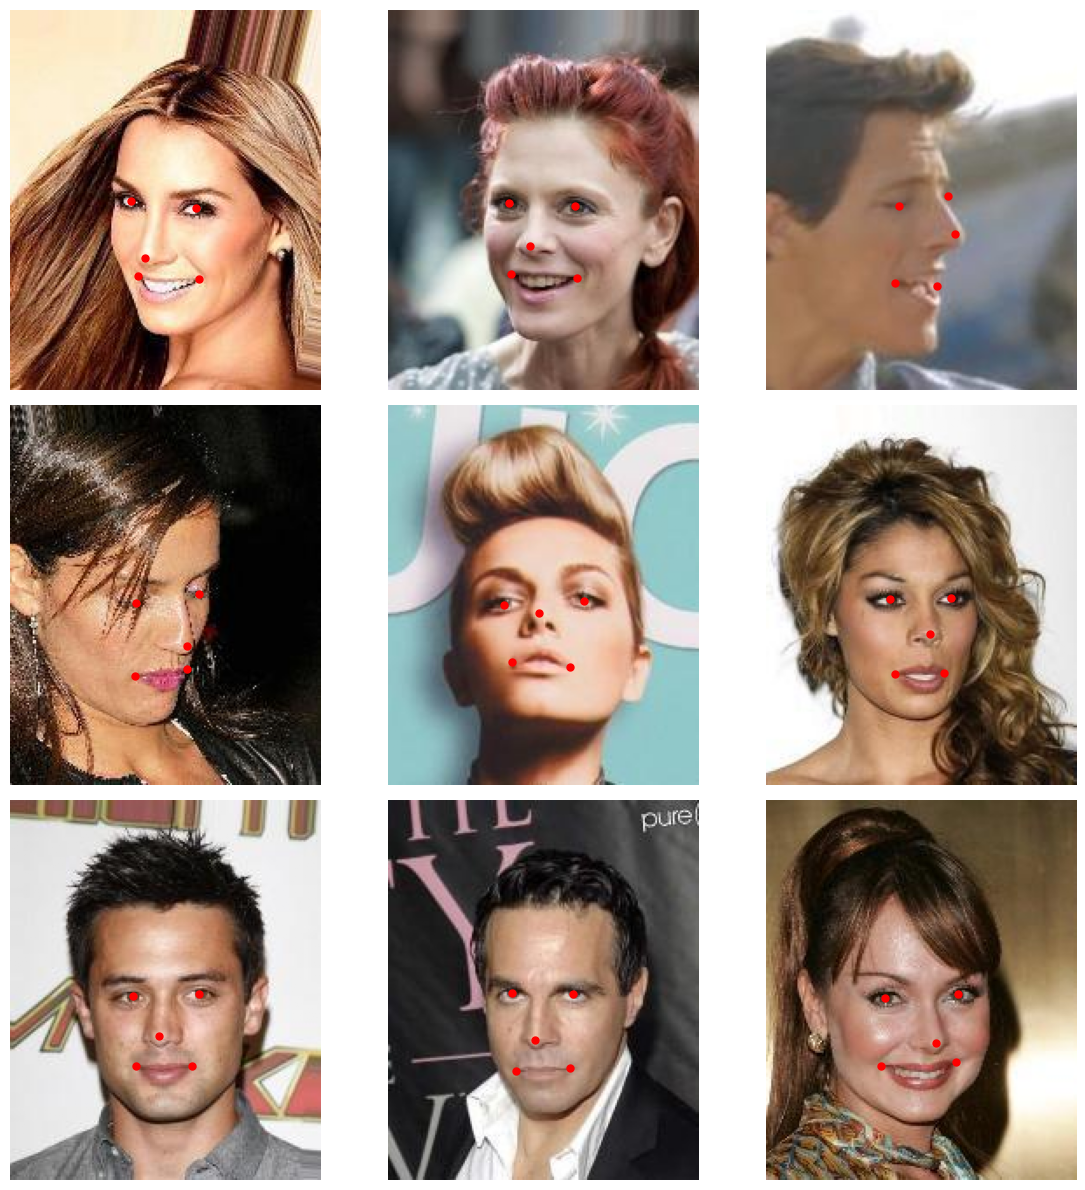

In [43]:
# Extract bounding boxes and landmarks
def get_sample_with_annotations(idx):
    img, (bbox, landmarks) = dataset_landmarks[idx]
    bbox = bbox.tolist()
    landmarks = landmarks.reshape(5, 2).tolist()
    return img, bbox, landmarks

# Create a 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    img, bbox, landmarks = get_sample_with_annotations(i)

    # Convert tensor to numpy image for plotting
    img_np = img.permute(1, 2, 0).numpy()

    # Display the image
    ax.imshow(img_np)

    # Draw bounding box
    #x, y, w, h = bbox  # Top-left (x, y), width, height
    #rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='red', facecolor='none')
    #ax.add_patch(rect)

    # Plot landmarks as green dots
    for (lx, ly) in landmarks:
        ax.plot(lx, ly, 'ro', markersize=5)  # 'g' for green, 'o' for dots

    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

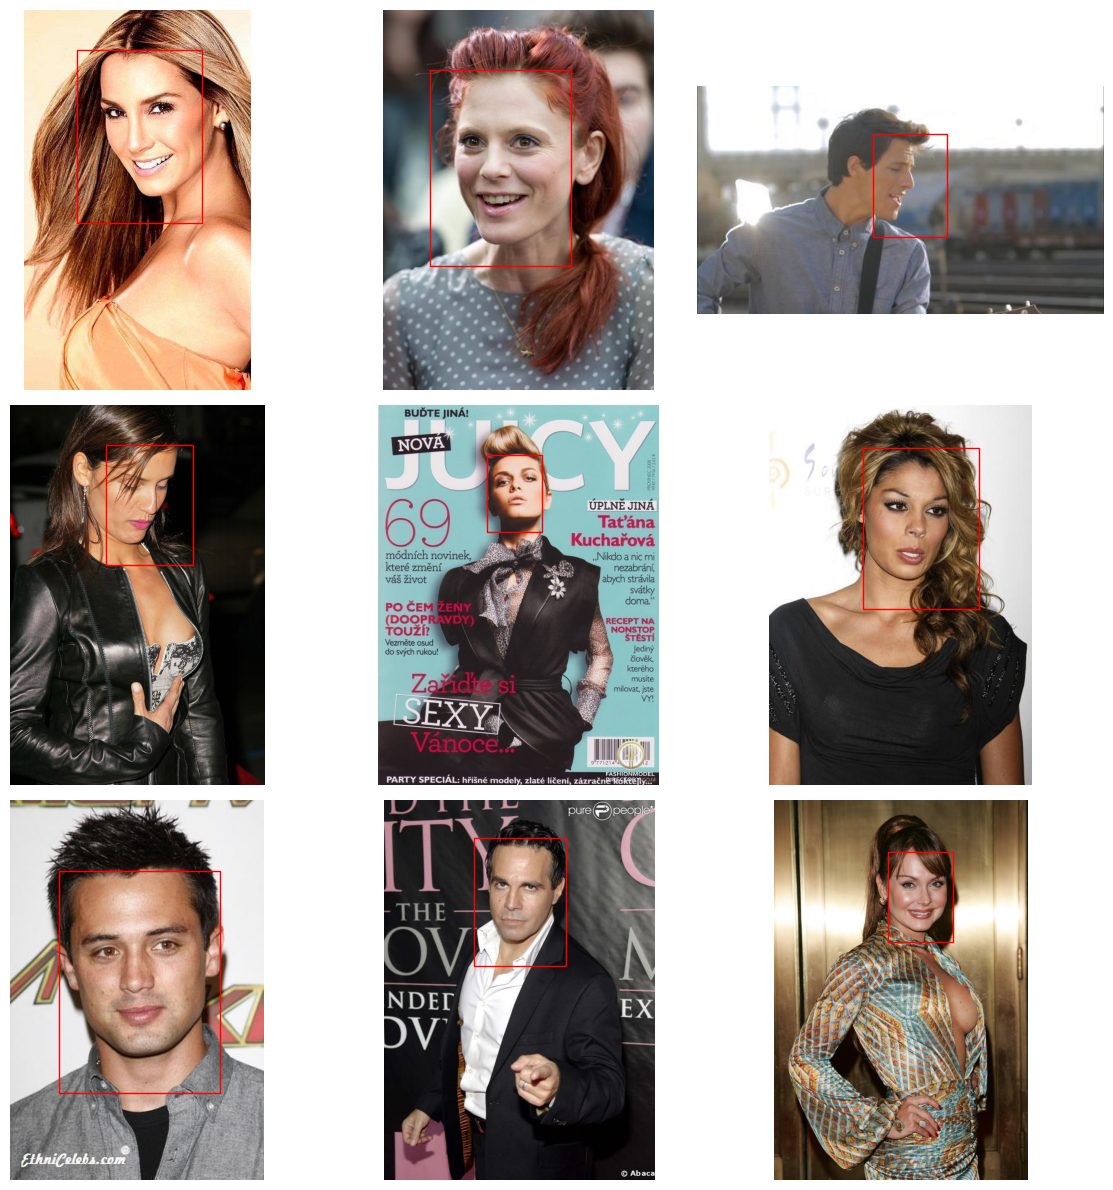

In [44]:
# Extract bounding boxes and landmarks
def get_sample_with_annotations(idx):
    img, (bbox, landmarks) = dataset_bbox[idx]
    bbox = bbox.tolist()
    landmarks = landmarks.reshape(5, 2).tolist()
    return img, bbox, landmarks

# Create a 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    img, bbox, landmarks = get_sample_with_annotations(i)

    # Convert tensor to numpy image for plotting
    img_np = img.permute(1, 2, 0).numpy()

    # Display the image
    ax.imshow(img_np)

    # Draw bounding box
    x, y, w, h = bbox  # Top-left (x, y), width, height
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Plot landmarks as green dots
    #for (lx, ly) in landmarks:
    #    ax.plot(lx, ly, 'bo', markersize=5)  # 'g' for green, 'o' for dots

    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [42]:
model = 
model.to(device)

_ = summary(model, input_size=(1, 10), dtypes=[torch.long], col_names=["input_size", "output_size", "num_params", "trainable", "mult_adds"], col_width=20, row_settings=["var_names"], verbose = 2)

NameError: name 'ArtikelLSTM' is not defined

In [ ]:
if OPTIMIZER == "Adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
elif OPTIMIZER == "SGD":
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss()
#scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

train_losses = []
test_losses = []
test_accuracies = []
max_accuracy = 0

In [ ]:
# Training loop
#add_text("")

for epoch in range(10):  # Number of epochs
    train_loss = train_epoch(model, train_dataloader, optimizer, loss_fn, device)
    test_loss, test_accuracy = eval_epoch(model, test_dataloader, loss_fn, device)
    #scheduler.step()

    writer.add_scalar('Loss/train', train_loss, epoch)
    writer.add_scalar('Loss/test', test_loss, epoch)
    writer.add_scalar('Accuracy/train', test_accuracy, epoch)
    
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss.cpu())
    test_accuracies.append(test_accuracy)

    if test_accuracy > max_accuracy:
        max_accuracy = test_accuracy
        torch.save(model.state_dict(), f'models/{run_name}' + f'-acc{test_accuracy:.2f}.pth')
        


    print(f"Epoch {epoch+1}, Train_loss: {train_loss.item():.4f}, Test_loss: {test_loss.item():.4f}, Accuracy: {test_accuracy:.4f}")

In [ ]:
plt.plot(test_losses, label="test")
plt.plot(train_losses, label="train")
plt.legend()
plt.show()

In [ ]:
#plt.plot(train_accuracies, label="train")
plt.plot(test_accuracies, label="test")
plt.legend()
plt.show()